In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.shape

(1025, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
data['target'].unique()

array([0, 1])

In [9]:
x = data.drop('target',axis = 1)
y = data['target']

`Normalizing the Data`

In [10]:
# X_norm = Normalizer().fit(x)
# X_norm = X_norm.transform(x)

`Splitting the data`

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=40)

`Decision Tree Classifier`

`criterion: gini`

In [12]:
clf = DecisionTreeClassifier(criterion = 'gini', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [13]:
y_pred = clf.predict(X_test) 

`Accuracy when criterion set to gini`

In [14]:
accuracy_score(y_test, y_pred)

0.9634146341463414

`criterion: entropy`

In [15]:
clf1 = DecisionTreeClassifier(criterion = 'entropy', random_state=40)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=40)

In [16]:
y_pred = clf1.predict(X_test) 

`Accuracy when criterion set to entropy`

In [17]:
accuracy_score(y_test, y_pred)

0.9707317073170731

In [19]:
export_graphviz(clf1, 'tree1.dot', filled=True, feature_names=X_train.columns, rounded=True)
# !dot -Tpng 'tree1.dot' -o  'tree1.png'

`Train decision trees with different values of the minimum number of samples required to split an internal
node.`

In [27]:
train_acc = []
test_acc =[]
for i in range(2,10):
    clf2 = DecisionTreeClassifier(min_samples_split = i ,criterion = 'entropy', random_state=40)
    clf2.fit(X_train, y_train)
    y_pred_train = clf2.predict(X_train)
    z = accuracy_score(y_train, y_pred_train)
    train_acc.append(z)
    y_pred_test = clf2.predict(X_test) 
    z1 = accuracy_score(y_test, y_pred_test)
    test_acc.append(z1)

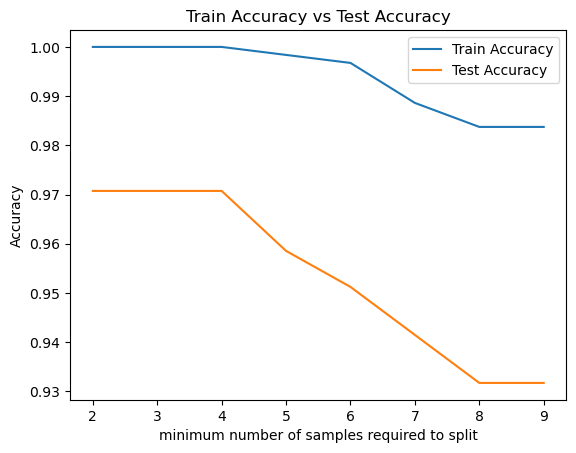

In [37]:
min_samples = range(2, 10)
plt.plot(min_samples, train_acc, label='Train Accuracy')
plt.plot(min_samples, test_acc, label='Test Accuracy')
plt.title('Train Accuracy vs Test Accuracy')
plt.xlabel('minimum number of samples required to split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Best value for minimum number of samples required to split: {1,2,3}